In [152]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches


In [153]:
n = pypsa.Network("/Users/jeremykurniawan/Desktop/RES_mac/Thesis/pypsa-eur_results/test-elec/networks/elec_s_6_ec_lcopt_Co2L-24H.nc")

INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-24H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [154]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 12 entries
Component 'Carrier' has 20 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 7 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 19 entries
Component 'Load' has 6 entries
Component 'Generator' has 28 entries
Component 'StorageUnit' has 6 entries
Component 'Store' has 6 entries


In [155]:
n.generators.head()

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,n_mod
Generator,,,,,,,,,,,,,,,,,,,,,
BE0 0 OCGT,OCGT,BE0 0,520.300000,520.300000,True,0.41,53.534783,864.844084,inf,1.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0
BE0 0 offwind-ac,offwind-ac,BE0 0,777.674226,777.674226,False,1.00,0.024572,3516.761233,777.674226,1.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0
BE0 0 offwind-dc,offwind-dc,BE0 0,1476.225774,1476.225774,False,1.00,0.024454,3859.319561,1476.225774,1.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0
BE0 0 oil,oil,BE0 0,36.000000,36.000000,False,0.35,148.867245,726.289457,inf,1.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0
BE0 0 onwind,onwind,BE0 0,87.211398,87.211398,False,1.00,0.025439,1842.743058,576.427113,1.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0


In [156]:
#Plot Network
import cartopy.crs as ccrs

loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

<function matplotlib.pyplot.show(close=None, block=None)>

/Users/jeremykurniawan/opt/anaconda3/envs/pypsa-eur/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/jeremykurniawan/opt/anaconda3/envs/pypsa-eur/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/jeremykurniawan/opt/anaconda3/envs/pypsa-eur/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


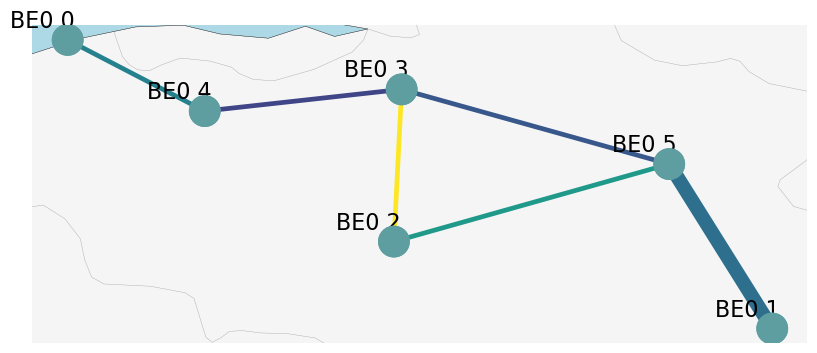

In [157]:
fig, ax = plt.subplots(
    figsize=(10,18),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show

In [158]:
def inst_cap_plot():

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()

    plt.rcParams.update({'font.size': 16})

    fig = plt.figure(figsize=(17,17))
    ax = plt.axes(projection=ccrs.PlateCarree())

    n.plot(
        ax=ax,
        margin=0.3,
        bus_sizes= capacities / 1e5,
        title=f"Installed power capacities"
    )

    add_legend_patches(
        ax,
        n.carriers.color,
        n.carriers.index,
        legend_kw=dict(frameon=False, bbox_to_anchor=(0,1))
    )

    return capacities

ValueError: Invalid RGBA argument: ''

/Users/jeremykurniawan/opt/anaconda3/envs/pypsa-eur/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


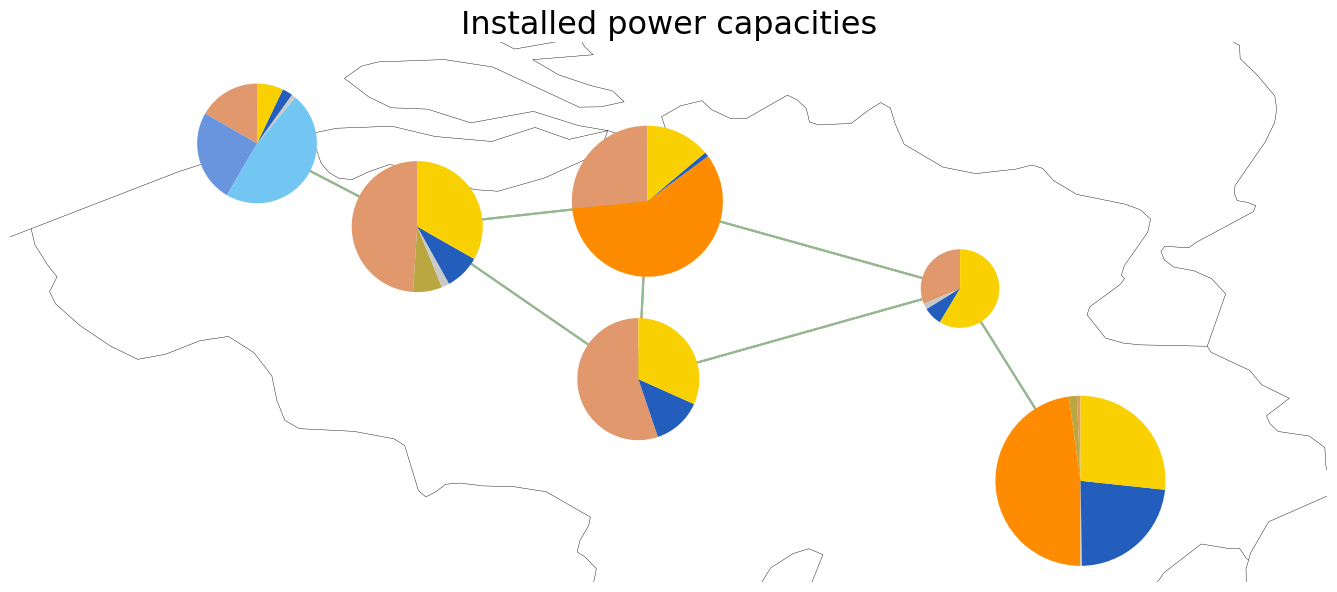

In [159]:
inst_cap_plot()

In [160]:
gen = n.generators
carrier = gen.carrier.unique()
def gen_power_table(colors):

    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    (generations.unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

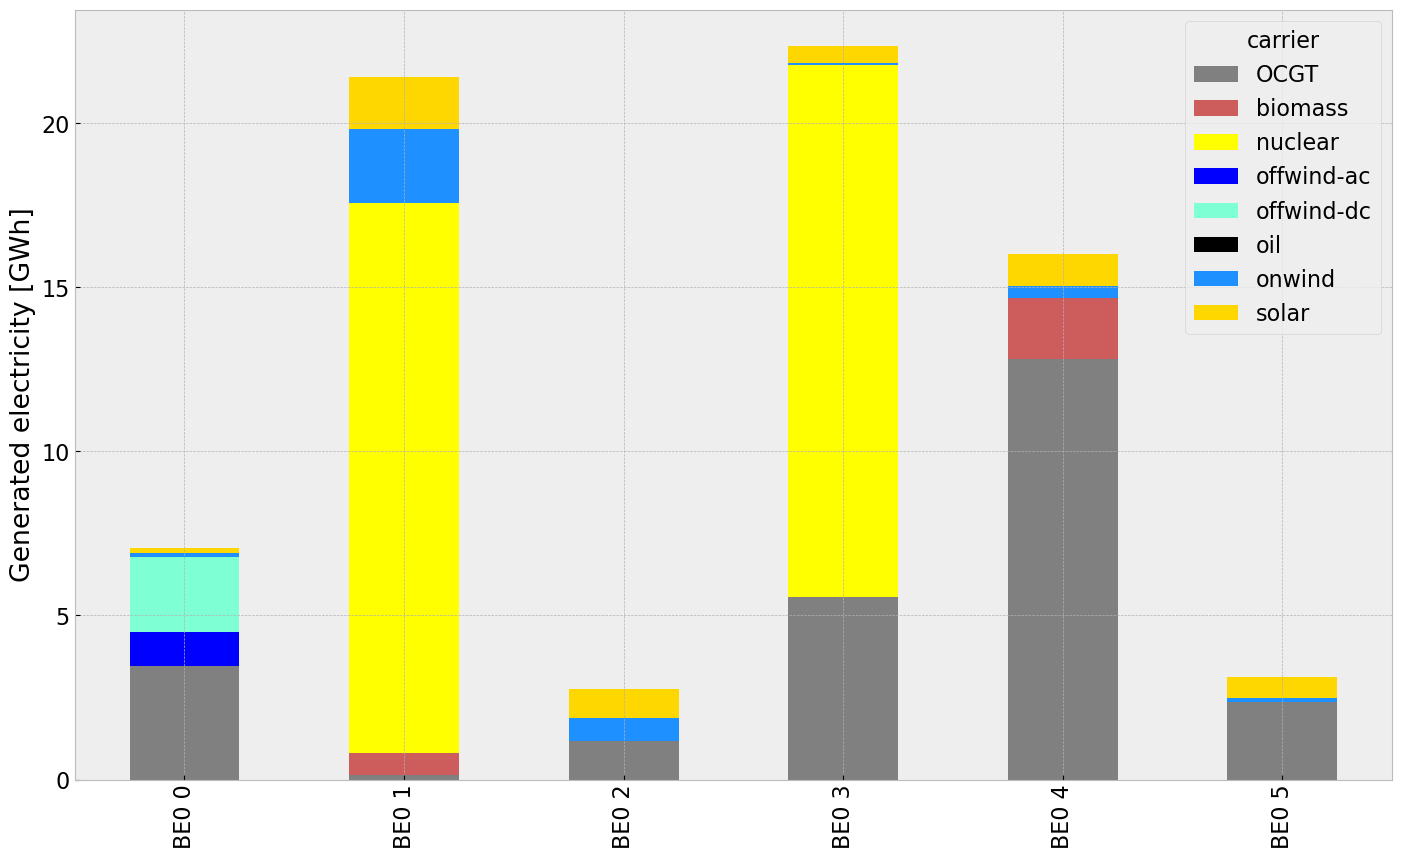

In [161]:
colors = ["grey", "indianred", "yellow", "blue", "aquamarine", "black", "dodgerblue", "gold", "yellowgreen", "magenta"]
gen_power_table(colors)

In [162]:
def inst_cap_table(colors):

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    (capacities.unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

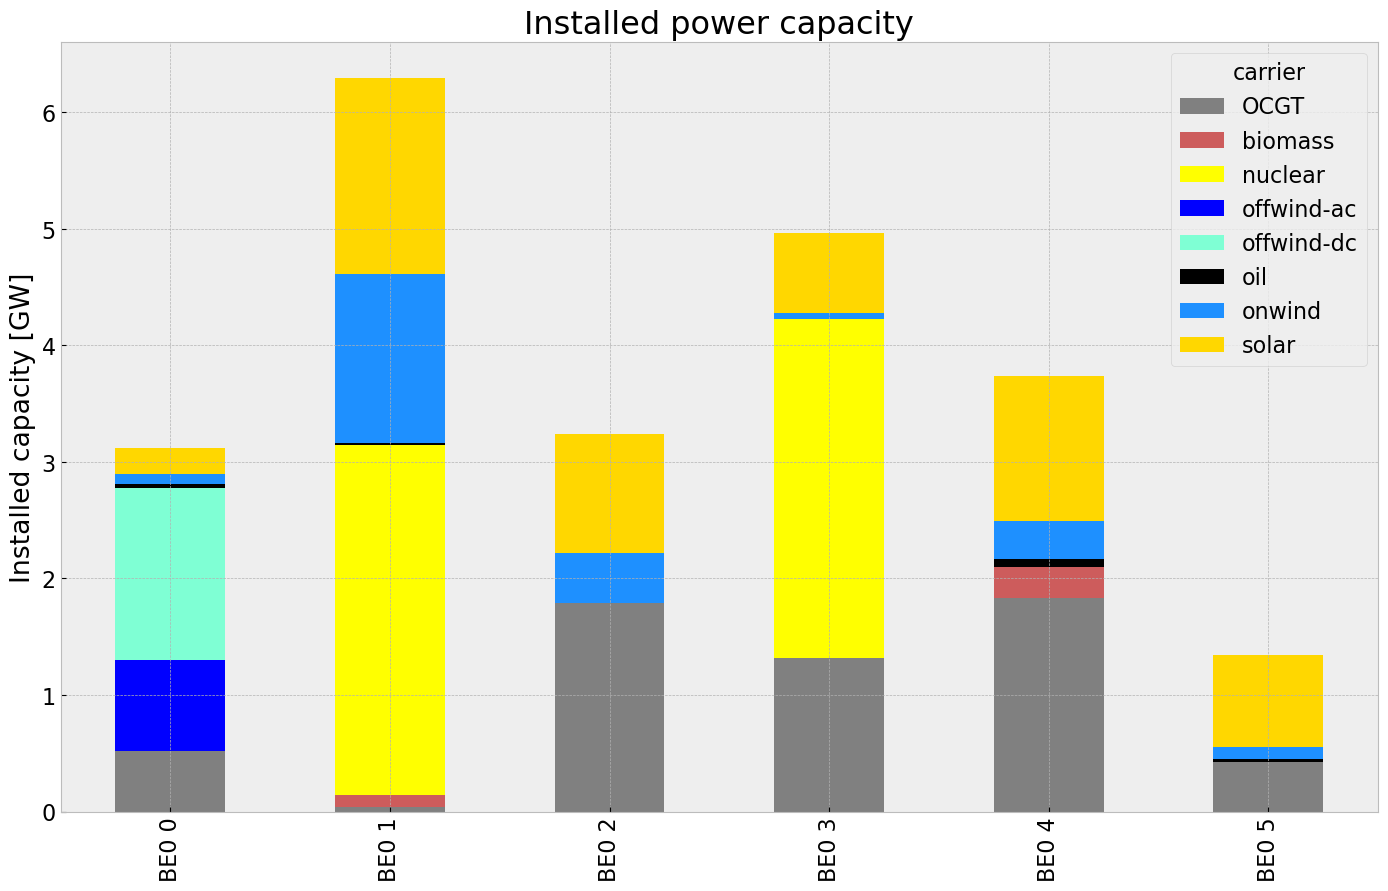

In [163]:
inst_cap_table(colors)

In [173]:
 def gen_curve_month_summer(colors):

    plt.rcParams.update({'font.size': 16})

    time="2013-03"

    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(14, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-20, 20)

/var/folders/k2/pp6kkkdd5fv3y276km0t2cl00000gn/T/ipykernel_22140/1508182590.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
/var/folders/k2/pp6kkkdd5fv3y276km0t2cl00000gn/T/ipykernel_22140/1508182590.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
/Users/jeremykurniawan/opt/anaconda3/envs/pypsa-eur/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


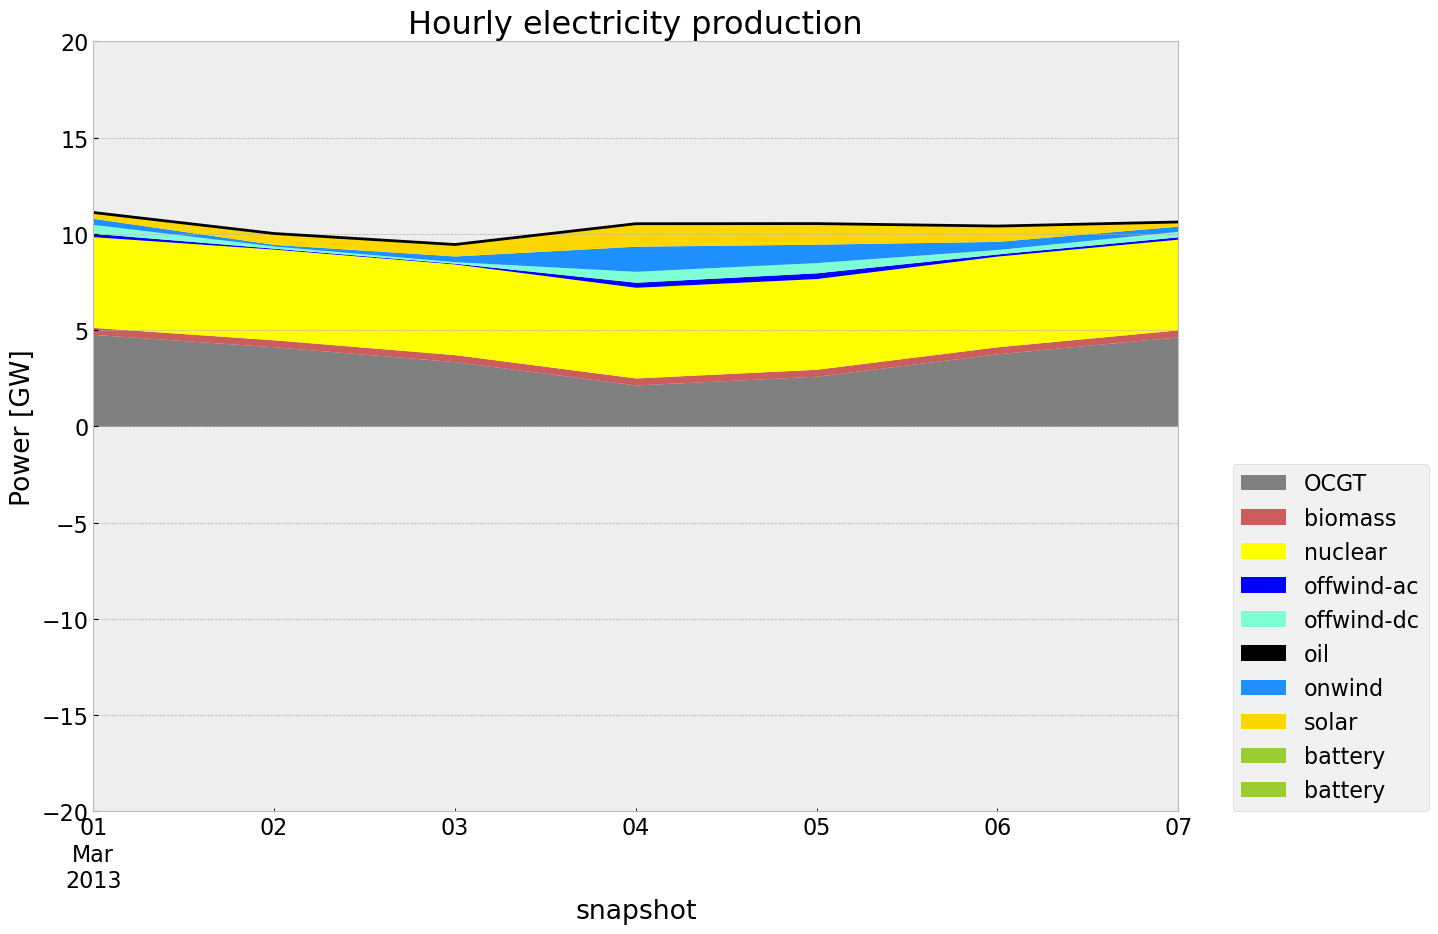

In [174]:
gen_curve_month_summer(colors)

<AxesSubplot:xlabel='snapshot'>

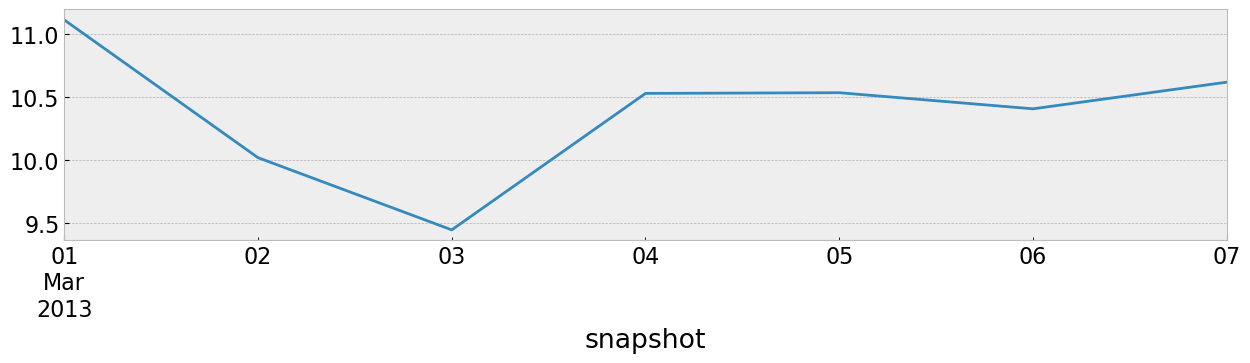

In [178]:
n.loads_t.p_set.sum(axis=1).div(1e3).plot(figsize=(15,3))

In [179]:
def inst_store_table():
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacities of storage systems",
                                ylim=[0,50]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

carrier,battery
bus,
BE0 0,7.253371e-13
BE0 1,7.253214e-13
BE0 2,7.253455e-13
BE0 3,7.253305e-13
BE0 4,7.253307e-13
BE0 5,7.253278e-13


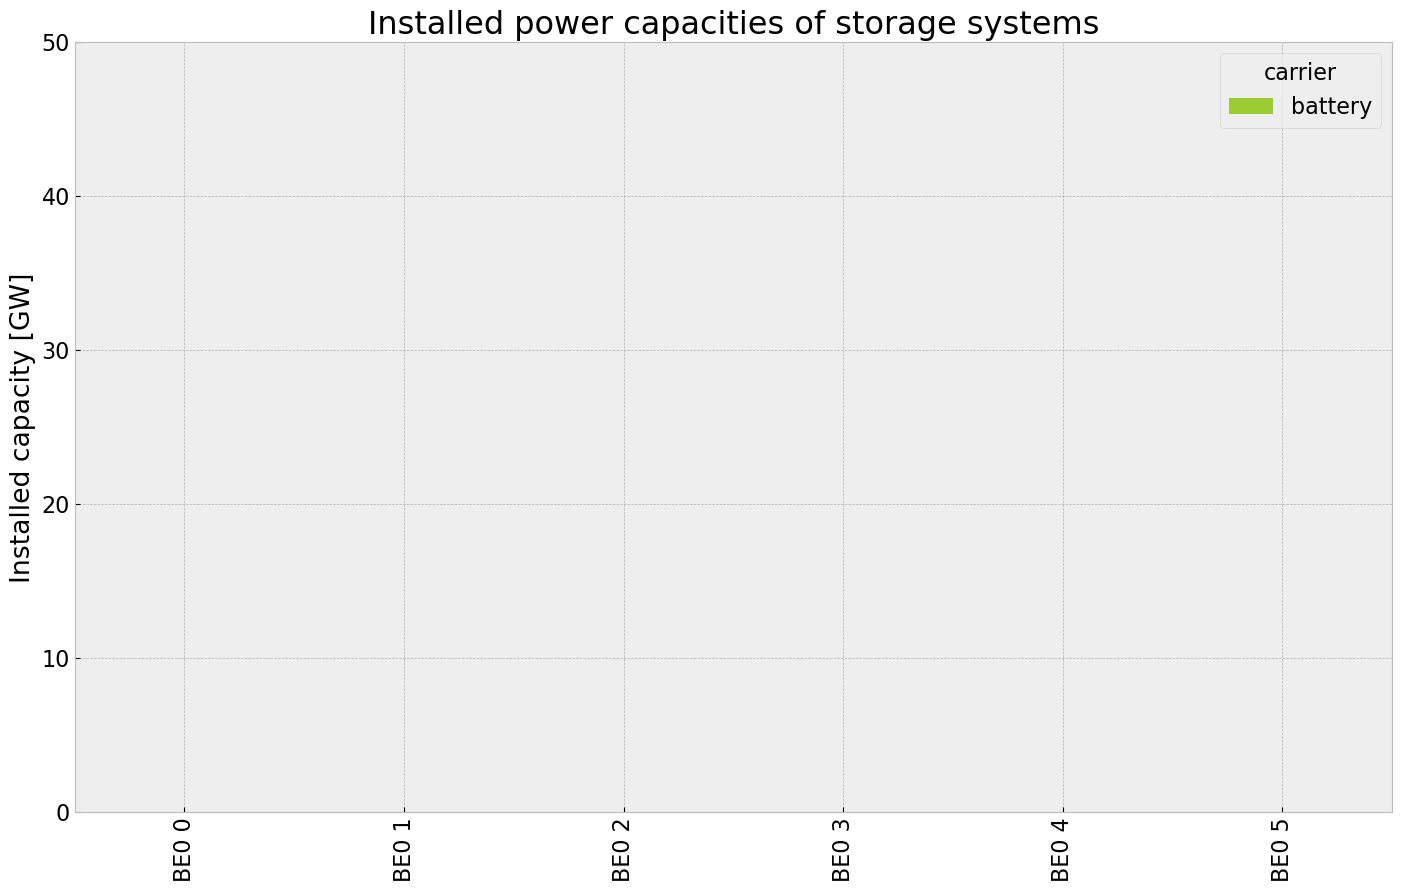

In [181]:
inst_store_table()

In [182]:
n.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Offshore Wind (AC)      7.776742e+02          777.674226   
            Offshore Wind (DC)      1.476226e+03         1476.225774   
            Onshore Wind            2.437820e+03         2437.820000   
            Open-Cycle Gas          5.923509e+03         4910.300000   
            Solar                   5.646400e+03         5646.400000   
            biomass                 3.630000e+02          363.000000   
            nuclear                 5.919000e+03         5919.000000   
            oil                     1.586000e+02          158.600000   
Line        AC                      2.716964e+04        27169.641788   
Link        H2 electrolysis         2.396115e-09            0.000000   
            H2 fuel cell            9.650837e-10            0.000000   
            H2 pipeline             7.513317e-08            0.000000   
Load        -                       0.000000e+00            0.000000   
StorageUnit Battery Storage         4.351993e-09            0.000000   
Store       Hydrogen Storage        1.125962e-06            0.000000   

                                Capacity Factor      Dispatch  Transmission  \
Generator   Offshore Wind (AC)     1.936692e-01  2.530274e+04  0.000000e+00   
            Offshore Wind (DC)     2.194627e-01  5.442804e+04  0.000000e+00   
            Onshore Wind           2.138282e-01  8.757416e+04  0.000000e+00   
            Open-Cycle Gas         6.140392e-01  6.110607e+05  0.000000e+00   
            Solar                  1.192430e-01  1.131133e+05  0.000000e+00   
            biomass                1.000000e+00  6.098400e+04  0.000000e+00   
            nuclear                7.960000e-01  7.915360e+05  0.000000e+00   
            oil                    3.939378e-13  1.049639e-08  0.000000e+00   
Line        AC                     1.311512e-01  0.000000e+00  2.533072e+04   
Link        H2 electrolysis        1.590282e-01 -1.280328e-08  0.000000e+00   
            H2 fuel cell           3.158689e-01 -2.150951e-08  0.000000e+00   
            H2 pipeline            7.947471e-03  0.000000e+00 -3.345159e-08   
Load        -                               NaN -1.743999e+06  0.000000e+00   
StorageUnit Battery Storage        2.996357e-02 -1.265299e-08  0.000000e+00   
Store       Hydrogen Storage       5.000000e-01  0.000000e+00  0.000000e+00   

                                  Withdrawal        Supply   Curtailment  \
Generator   Offshore Wind (AC)  0.000000e+00  2.530274e+04  1.534022e-08   
            Offshore Wind (DC)  0.000000e+00  5.442804e+04  2.324873e-08   
            Onshore Wind        0.000000e+00  8.757416e+04  3.276496e-08   
            Open-Cycle Gas      0.000000e+00  6.110607e+05  0.000000e+00   
            Solar               0.000000e+00  1.131133e+05  7.752305e-08   
            biomass             0.000000e+00  6.098400e+04  0.000000e+00   
            nuclear             0.000000e+00  7.915360e+05  0.000000e+00   
            oil                 0.000000e+00  1.049639e-08  0.000000e+00   
Line        AC                  5.986396e+05  5.986396e+05  0.000000e+00   
Link        H2 electrolysis     6.401639e-08  5.121311e-08  0.000000e+00   
            H2 fuel cell        5.121311e-08  2.970360e-08  0.000000e+00   
            H2 pipeline         1.003159e-07  1.003159e-07  0.000000e+00   
Load        -                   1.743999e+06  0.000000e+00  0.000000e+00   
StorageUnit Battery Storage     1.728020e-08  4.627208e-09  0.000000e+00   
Store       Hydrogen Storage    8.377736e-09  8.377736e-09  0.000000e+00   

                                Capital Expenditure  Operational Expenditure  \
Generator   Offshore Wind (AC)         2.734895e+06             6.217460e+02   
            Offshore Wind (DC)         5.697227e+06             1.330967e+03   
            Onshore Wind               4.492276e+06             2.160709e+03   
            Open-Cycle Gas             5.122911e+06             3.312178e+07 

In [183]:
n.statistics.opex()

component    carrier           
StorageUnit  Battery Storage       2.973454e-09
Store        Hydrogen Storage      1.009742e-27
Link         H2 electrolysis       6.313962e-10
             H2 fuel cell          5.214860e-10
             H2 pipeline          -3.514148e-10
Generator    Offshore Wind (AC)    6.217460e+02
             Offshore Wind (DC)    1.330967e+03
             Onshore Wind          2.160709e+03
             Open-Cycle Gas        3.312178e+07
             Solar                 2.272504e+03
             biomass               9.089002e+05
             nuclear               9.014373e+06
             oil                   1.562569e-06
dtype: float64